# Group 15

- Arvind Kumar Deenadayalan Raju
- Blessy Gabriel
- Nihkin Jacob
- John Oloyede

# Big Data Coursework - Road Safety Data (Birmingham)
This is a Data Preprocessing and Exploratory Data Analysis (EDA) report for Road Safety Data in Birmingham.

# Introduction
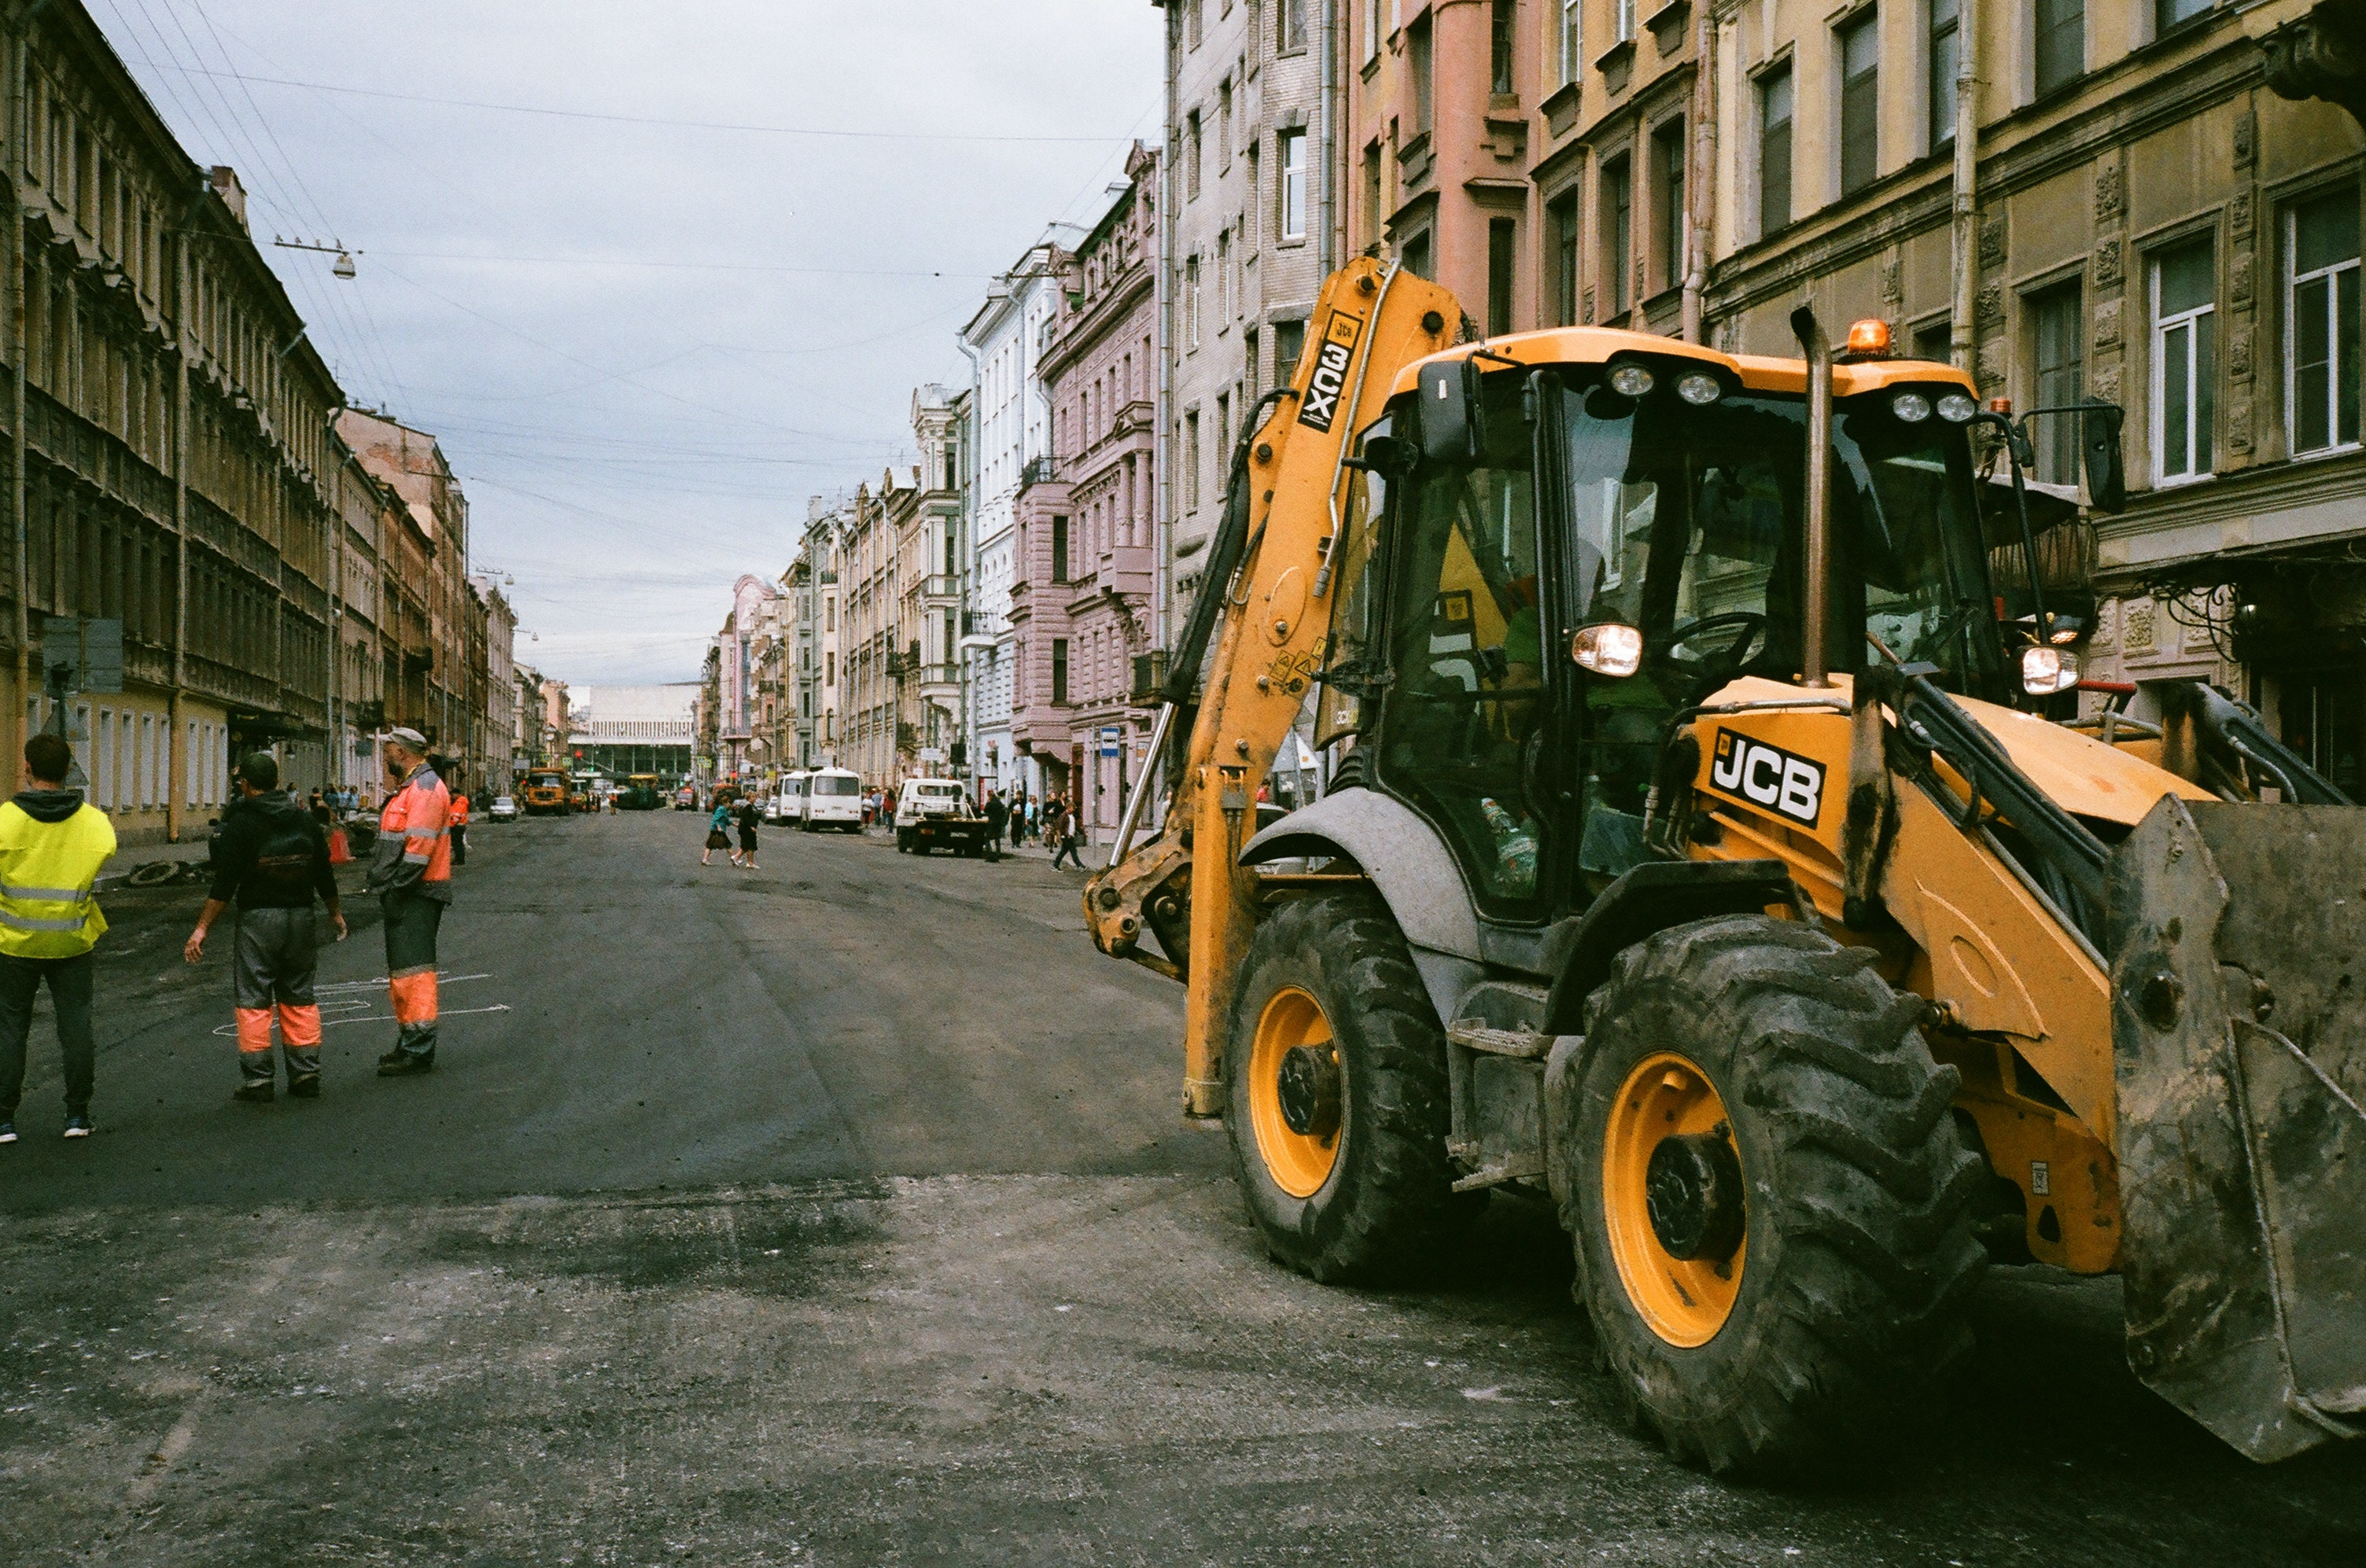
## Business Problem 
The Birmingham City Council is interested in predicting the number of road accidents that are likely to occur in their area. The purpose of this prediction is to allocate resources for road maintenance and improvement projects in a more informed and efficient way. By forecasting the number of accidents, the government can gain insights into which roads are the most dangerous or hazardous and need to be improved. This can help them to prioritize their resources and focus their efforts on areas that are likely to have the greatest impact on road safety.

Overall, the goal of this project is to use predictive analytics in Birmingham as the dependent variable to help the Birmingham City Council to better understand and manage road safety in their area. By using data to inform their decision-making, they can make more informed choices about how to allocate their resources and take steps to improve the safety of their roads.

**Prediction**
- Number of Accidents per Month

**Data Source**

The dataset required from this analysis is acquired from the link below:
https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data


## 1) Import Libraries, Packages and Required Dataset

In [599]:
#Importing all the necessary packages for the EDA project
# Base Libraries
import pandas as pd

pd.set_option('display.max_colwidth', None)
from pandas import DataFrame

# Libraries for Plotting
import seaborn as sb
import matplotlib.pyplot as plt

#packages for Data preprocessing and Cleaning
from sklearn.preprocessing import LabelEncoder

In [600]:
# Setting a color palette for my graphs
graph_palette = ["#83008F", "#32394E", "#FFFF41"]
sb.set_palette(palette=graph_palette)

### 1.1) Loading Dataset - Road Safety Data (Accident Data From 1979 to 2021)
The dataset contains all road accidents that have occurred in the United Kingdom between 1979 and 2021

In [601]:
#Load Initial Dataset
# This data set contains both the dependent and the independent analysis which be required to complete the analysis
# df_accident = pd.read_csv('dft-road-casualty-statistics-accident-1979-2021.csv', low_memory=False)
df_accident = pd.read_csv("dft-road-casualty-statistics-accident-last-5-years.csv", low_memory=False)

In [602]:
#Display First 5 Rows to validate the accident dataframe
df_accident.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2,0,0,1,1,2,E01001808


In [603]:
# Validating the number of rows and columns
df_accident.shape

(562439, 36)

There are 8.7 million accidents and 36 variables which explain the situation around that accident. This dataset will later be filtered out to what we need to focus on Birmingham.

In [604]:
#Provide a summary of the dataframe
df_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562439 entries, 0 to 562438
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               562439 non-null  object 
 1   accident_year                                562439 non-null  int64  
 2   accident_reference                           562439 non-null  object 
 3   location_easting_osgr                        562306 non-null  float64
 4   location_northing_osgr                       562306 non-null  float64
 5   longitude                                    562296 non-null  float64
 6   latitude                                     562296 non-null  float64
 7   police_force                                 562439 non-null  int64  
 8   accident_severity                            562439 non-null  int64  
 9   number_of_vehicles                           562439 non-nul

Variables are categorised into multiple types : Nominal, Ordinal, Interval, Ratio.
To simplify, the types are narrowed down into 3 main types:
- Numeric : Variables containing numeric values.
- Categorical : Variables containing text data / each unique value indicates a category.
- Boolean : Categorical Variables with two categories

## 1.2)Selection of Relevant Section of Data
We would be focusing on Birmingham's accident data, and also the accidents which happened within the last 10 years. The Road Safety Dataset Guide helps us identify all data which regards with Birmingham are categorised under the local authority district as **300**

In [605]:
# Limiting Data to Birmingham Only
df_accident = df_accident[(df_accident.local_authority_district == 300)]
df_accident.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
55371,2017200141443,2017,200141443,412319.0,295720.0,-1.819712,52.559195,20,3,1,...,1,4,8,2,0,0,1,2,2,E01009451
55372,2017200142150,2017,200142150,403593.0,284702.0,-1.948542,52.460269,20,3,3,...,0,1,8,4,0,0,1,2,2,E01009068
55376,2017200143906,2017,200143906,405762.0,286453.0,-1.916591,52.475992,20,2,1,...,0,4,9,1,0,0,1,1,2,E01033639
55377,2017200144448,2017,200144448,411986.0,286522.0,-1.824954,52.476512,20,2,1,...,0,1,1,1,0,0,1,1,2,E01009341
55380,2017200147014,2017,200147014,407379.0,281580.0,-1.892889,52.432165,20,2,1,...,0,4,2,2,0,0,1,1,2,E01009175


In [606]:
# Limiting Data to Last 10 Years (2010-2020) caused it is identified that there are no data in 2021 for Birmingham in 2021
# df_accident = df_accident[df_accident.accident_year.between(2016, 2022)]
# df_accident.head()

In [607]:
# Validating the number of rows and columns
df_accident.shape

(9762, 36)

The number of rows drop from 8.7 billion to 25,316

## 2) Descriptive Statistics on Main Data Before Grouping by Months and Location

This section, we look deeper into the variables of the dataframe before doing feature engineering (classifying the data by month and location) and further clean up, to help us understand the accidents which have been happening for the past 10 years in Birmingham city.

A selection of these variables will be used in the predictive model so the descriptive statistics are an important way to improve our understanding of them.

Histograms and box plots are given for each of the numerical variables to illustrate their skewness and to visualise any outliers.These outliers will be dealt with later in the assignment.

Bar charts are given for each of the categorical variables to illustrate their value counts.

Line graph are used to help illustrate distribution of variables across the chosen time period.

**Note: Although from the info most of the dataset are numeric, they are mostly categorical but are categorized by number not strings**

### 2.1) Number of Accidents

In [608]:
pd.DataFrame(df_accident.loc[:, 'accident_index'].describe())

,accident_index
count,9762
unique,9762
top,2017200141443
freq,1


There are a total of 25316 accidents that have happened in the past 10 years in Birmingham

### 2.2) Number of Casualties

In [609]:
pd.DataFrame(df_accident.loc[:, 'number_of_casualties'].describe())

,number_of_casualties
count,9762.000000
mean,1.349211
std,0.761924
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,8.000000


We can identify that the largest number of casualties recorded is 10, and the range of casualty rate in Birmingham is from 1 to 10

To illustrate the skewness of number of casualties, we plot the distribution with a histogram.

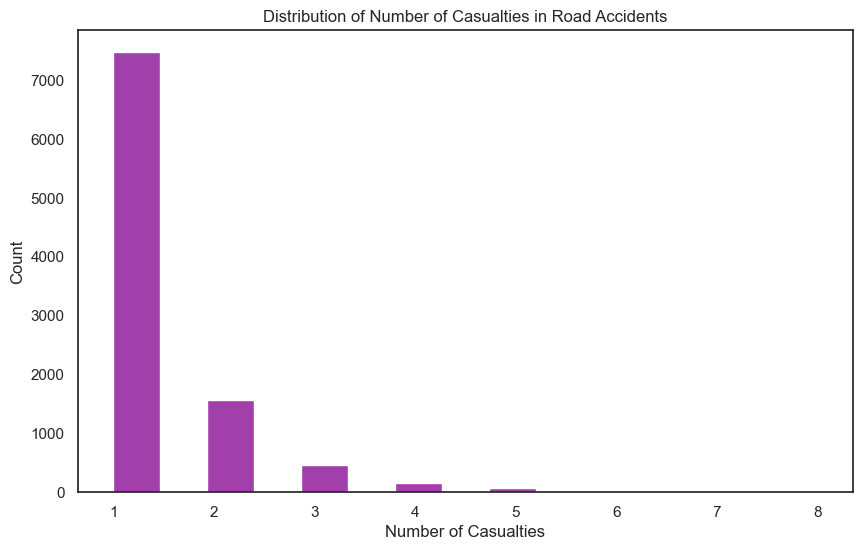

In [610]:
# Setting a color palette for my graphs
graph_palette = ["#83008F", "#32394E", "#FFFF41"]
sb.set_palette(palette=graph_palette)

# Set the background color to white
sb.set_style('white')
# creating a box plot of number_of_casualties
sb.histplot(x='number_of_casualties', data=df_accident)

# setting plot title and labels
plt.title('Distribution of Number of Casualties in Road Accidents')
plt.xlabel('Number of Casualties')
plt.show()

Based on the distribution, we can observe that the majority of accidents resulted in one casualty, while the second-highest number of casualties was two. As the number of casualties increases, the frequency of accidents decreases for those specific numbers.

### 2.3) Number of Vehicles Involved in accidents

In [611]:
pd.DataFrame(df_accident.loc[:, 'number_of_vehicles'].describe())

,number_of_vehicles
count,9762.000000
mean,1.897562
std,0.736005
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,14.000000


The average amount of cars involved in an accident is 2, but it can be identified from the analytics that there was a particular accident with 14 cars involved.

The distribution and skewness of this variable are illustrated by the histogram and box plot below.

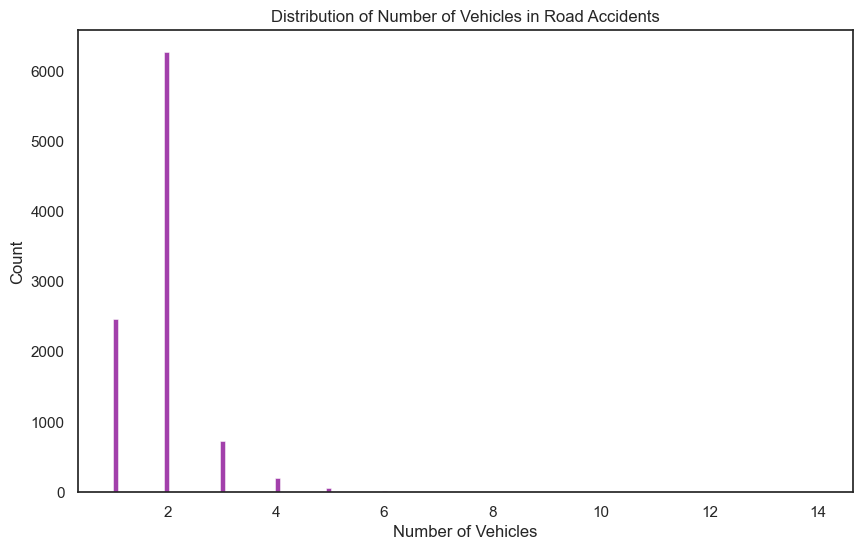

In [612]:
# Setting a color palette for my graphs
graph_palette = ["#83008F", "#32394E", "#FFFF41"]
sb.set_palette(palette=graph_palette)

# Set the background color to white
sb.set_style('white')
# creating a box plot of number_of_vehicles
sb.histplot(x='number_of_vehicles', data=df_accident)

# Setting plot title and labels
plt.title('Distribution of Number of Vehicles in Road Accidents')
plt.xlabel('Number of Vehicles')
plt.show()

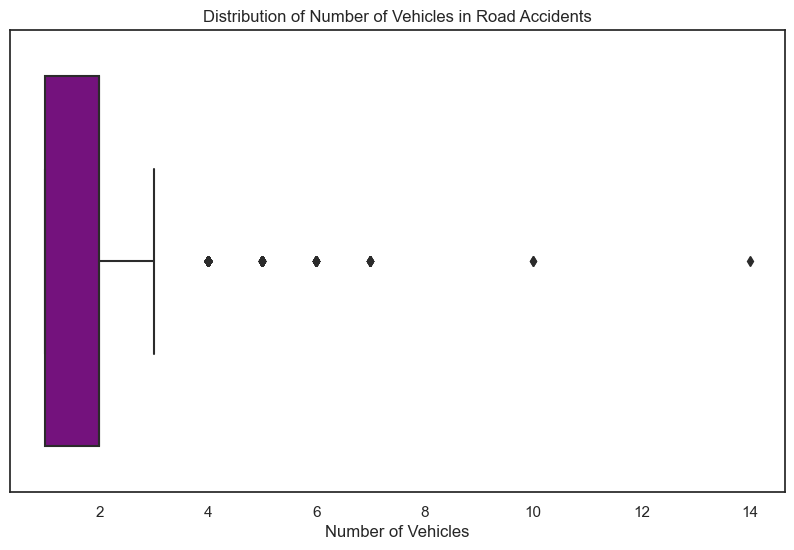

In [613]:
# Setting a color palette for my graphs
graph_palette = ["#83008F", "#32394E", "#FFFF41"]
sb.set_palette(palette=graph_palette)

# Set the background color to white
sb.set_style('white')
# create a box plot of number_of_vehicles
sb.boxplot(x='number_of_vehicles', data=df_accident)

# set plot title and labels
plt.title('Distribution of Number of Vehicles in Road Accidents')
plt.xlabel('Number of Vehicles')
plt.show()

The most common type of accident involves two cars, but we can also note a considerable number of accidents involving only one car. The majority of outliers in the data are at the higher end, ranging from 4 to 14 cars. It is important to retain this information, as it can shed light on the causes of accidents involving a significant number of vehicles.

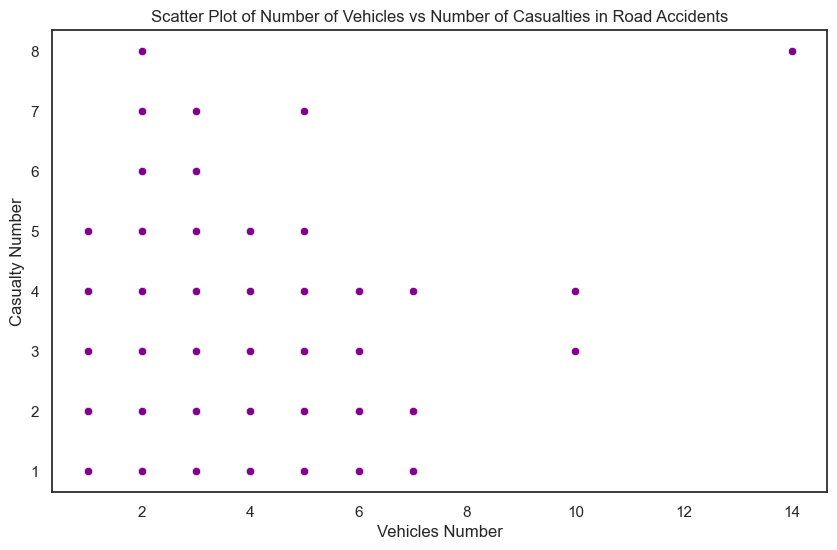

In [614]:
# Setting a color palette for my graphs
graph_palette = ["#83008F", "#32394E", "#FFFF41"]
sb.set_palette(palette=graph_palette)

# Create a scatter plot of number_of_vehicles vs number_of_casualties
sb.scatterplot(x="number_of_vehicles", y="number_of_casualties", data=df_accident)

# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the axes to remove the background color and set it to transparent
sb.axes_style("whitegrid")

# Set the plot title and axis labels
plt.title('Scatter Plot of Number of Vehicles vs Number of Casualties in Road Accidents')
plt.xlabel('Vehicles Number')
plt.ylabel('Casualty Number')

# Show the plot
plt.show()

This scatter plot suggests that the number of casualties in accidents is high even when the number of vehicles involved is low.

### 2.4) Accidents By Year Descriptive Statistics
We will be investigating the amount of accidents which have occurred across the years in Birmingham from 2010 till 2020

In [615]:
# Count the number of occurrences of each unique value in the `accident_year` column
accident_accident_year = df_accident['accident_year'].value_counts()

# Print the counts for each unique value
print(accident_accident_year)

2017    2724
2019    2623
2018    2614
2020    1801
Name: accident_year, dtype: int64


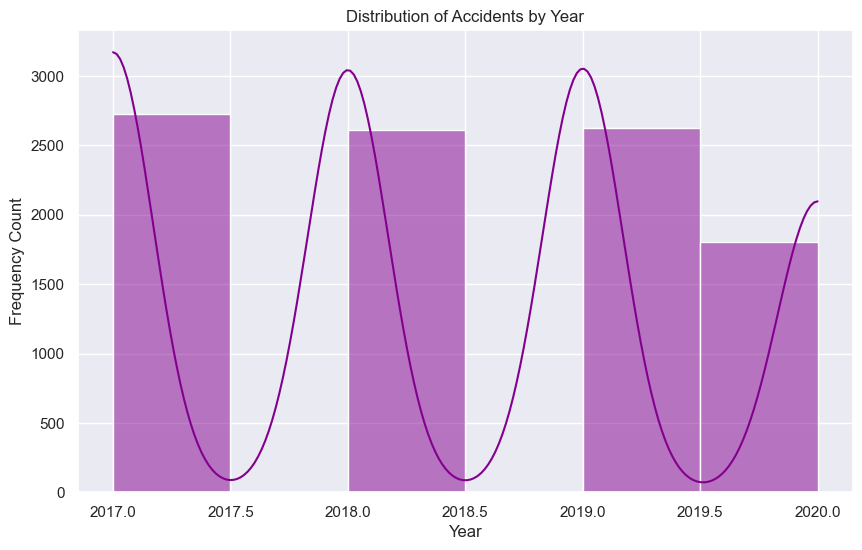

In [616]:
# create a distribution plot for accident count by year
sb.histplot(df_accident, x="accident_year", binwidth=0.5, kde=True, color='#83008F')

# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the background color to white
sb.set_style('white')

# set plot title and axis labels
plt.title('Distribution of Accidents by Year')
plt.xlabel('Year')
plt.ylabel('Frequency Count')

# show the plot
plt.show()

After analyzing both the count and histogram, it is evident that Birmingham had the highest number of accidents in 2015 over the 10-year period, followed by 2010. Conversely, the lowest number of accidents occurred in 2020. This could potentially be attributed to the lockdowns caused by Covid-19. However, further investigation is recommended as the accident rate in 2020 remains relatively high, despite the majority of the population being in lockdown for over 6 months.

**Comparison of Accidents by year against Casualties and Vehicles**

In [617]:
# Create the cross-tabulation table
cross_tab = pd.crosstab(index=df_accident['accident_year'], columns=df_accident['number_of_vehicles'])

# Print the table
print(cross_tab)

number_of_vehicles   1     2    3   4   5   6   7   10  14
accident_year                                             
2017                694  1724  226  52  16   9   1   1   1
2018                638  1708  195  54  11   6   2   0   0
2019                674  1678  191  52  20   5   3   0   0
2020                463  1158  123  40   9   3   4   1   0


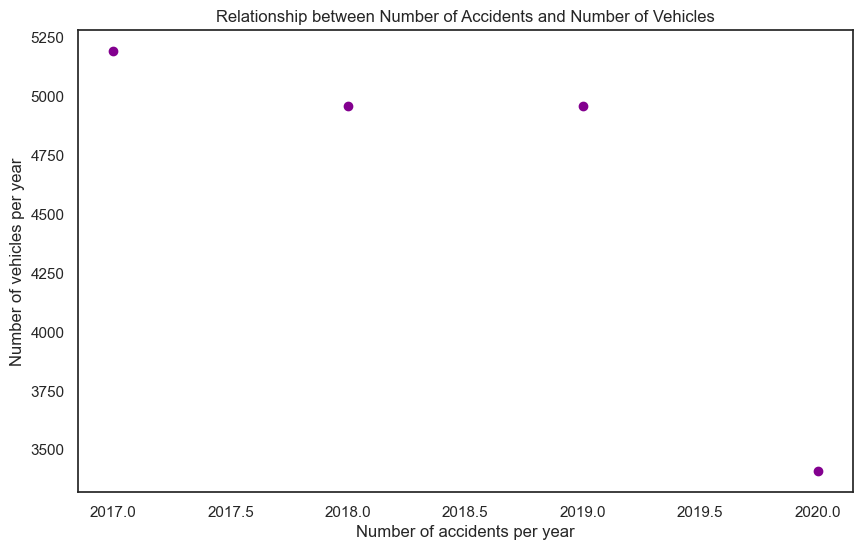

In [618]:
# Setting a color palette for my graphs
graph_palette = ["#83008F", "#32394E", "#FFFF41"]
sb.set_palette(palette=graph_palette)

# Group the data by year and compute the total number of accidents and vehicles for each year
grouped_data = df_accident.groupby('accident_year').agg({'number_of_vehicles': 'sum'})

# Create a scatter plot of number of accidents vs. number of vehicles
plt.scatter(grouped_data.index, grouped_data['number_of_vehicles'])

# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the background color to white
sb.set_style('white')

# Add axis labels and a title
plt.xlabel('Number of accidents per year')
plt.ylabel('Number of vehicles per year')
plt.title('Relationship between Number of Accidents and Number of Vehicles')

# Show the plot
plt.show()

Upon examining the data, it appears that the number of vehicles involved in accidents experienced a decrease from 2010 to 2012, followed by a gradual increase up to 2015, which had the highest number of accidents during the time period under consideration. Subsequently, there was another decline in the number of vehicles involved in accidents and a sharp decline by 2020 which is a result of low number of accidents that year..

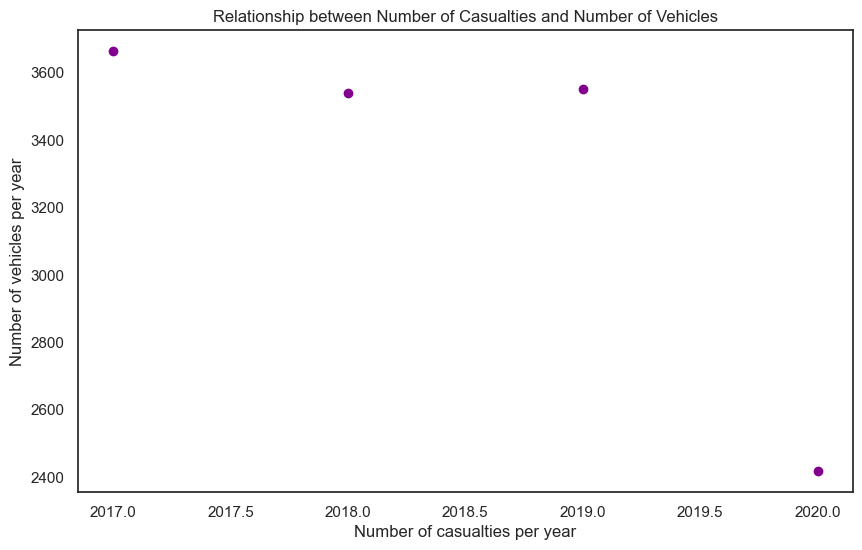

In [619]:
# Setting a color palette for my graphs
graph_palette = ["#83008F", "#32394E", "#FFFF41"]
sb.set_palette(palette=graph_palette)

# Group the data by year and compute the total number of accidents and casualties for each year
grouped_data = df_accident.groupby('accident_year').agg({'number_of_casualties': 'sum'})

# Create a scatter plot of number of accidents vs. number of casualties
plt.scatter(grouped_data.index, grouped_data['number_of_casualties'])

# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the background color to white
sb.set_style('white')

# Add axis labels and a title
plt.xlabel('Number of casualties per year')
plt.ylabel('Number of vehicles per year')
plt.title('Relationship between Number of Casualties and Number of Vehicles')

# Show the plot
plt.show()

We notice the same trend here as number of vehicles involved in accidents.

### 2.5) Accident Severity Deep Dive

In [620]:
# Count the number of occurrences of each unique value in the `number_of_casualties` column
accident_severity_counts = df_accident['accident_severity'].value_counts()

# Print the counts for each unique value
print(accident_severity_counts)

3    8202
2    1497
1      63
Name: accident_severity, dtype: int64


**Values Description**
- 1 = Fatal
- 2 = Serious
- 3 = Slight

This shows that a very large chunk of accidents **(84.6%)** which happen in Birmingham only results in slight injuries and less than **1%** result in death.

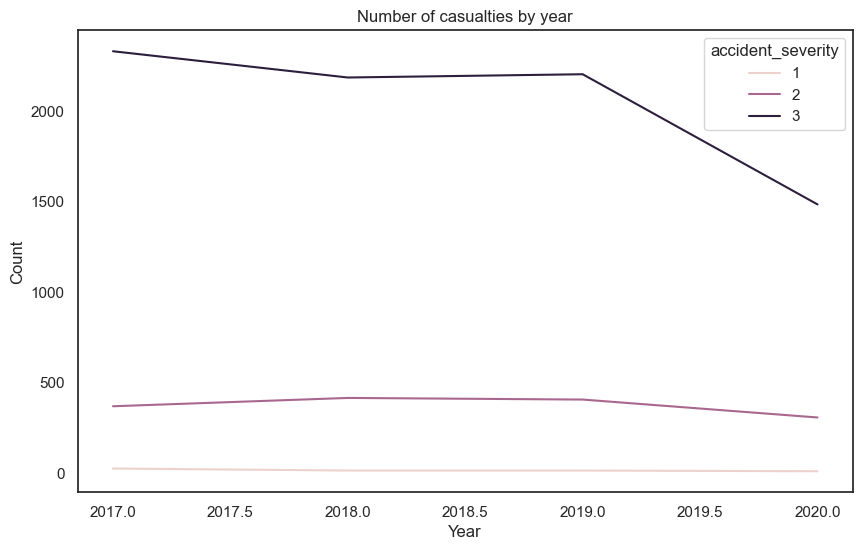

In [621]:
# Group the data by year and count the number of occurrences of each 
# unique value in the `number_of_casualties` column for each year
accident_severity_counts_by_year = df_accident.groupby('accident_year')['accident_severity'].value_counts().reset_index(
    name='count')

# Plot the count of each unique value in the `number_of_casualties` column by year
sb.lineplot(x='accident_year', y='count', hue='accident_severity', data=accident_severity_counts_by_year)

# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the axes to remove the background color and set it to transparent
sb.axes_style("whitegrid")

# Set the plot title and axis labels
plt.title('Number of casualties by year')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.show()

The line graph shows a trend of accident severity over the year, we can observe that the rate of fatality has dropped over the years. 

### 2.6) Speed Limit Descriptive Statistics

In [622]:
#Getting the value counts of the speed_limit variable
values = pd.DataFrame(df_accident.loc[:, 'speed_limit'].value_counts())
values.columns = ['Speed Limit']

#The normalize attribute in the value_counts method computes the percentage of each
percentages = pd.DataFrame(round(df_accident.loc[:, 'speed_limit'].value_counts(normalize=True) * 100, 2)
                           .map(lambda x: str(x) + '%'))
percentages.columns = ['Speed Limit %']
values.join(percentages)

,Speed Limit,Speed Limit %
30,8549,87.57%
40,661,6.77%
20,320,3.28%
70,137,1.4%
50,53,0.54%
60,42,0.43%


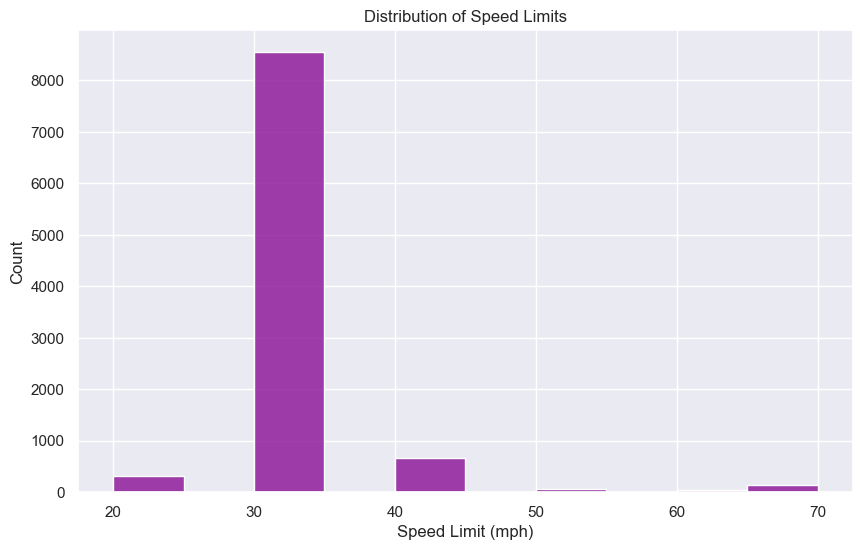

In [623]:
# Setting a color palette for my graphs
graph_palette = ["#83008F", "#32394E", "#FFFF41"]
sb.set_palette(palette=graph_palette)

# Create a histogram of the speed_limit variable using seaborn's hist plot function
sb.histplot(data=df_accident, x='speed_limit', bins=10)

# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the axes to remove the background color and set it to transparent
sb.axes_style("whitegrid")

# Set the plot title and axis labels
plt.title('Distribution of Speed Limits')
plt.xlabel('Speed Limit (mph)')

# Show the plot
plt.show()

We can observe that most accidents occur at areas where the speed limit is 30mph and although 70mph speed limit areas should have caused more accidents, only 1.6% of accidents that happened between 2010 - 2020 occurred in those areas.

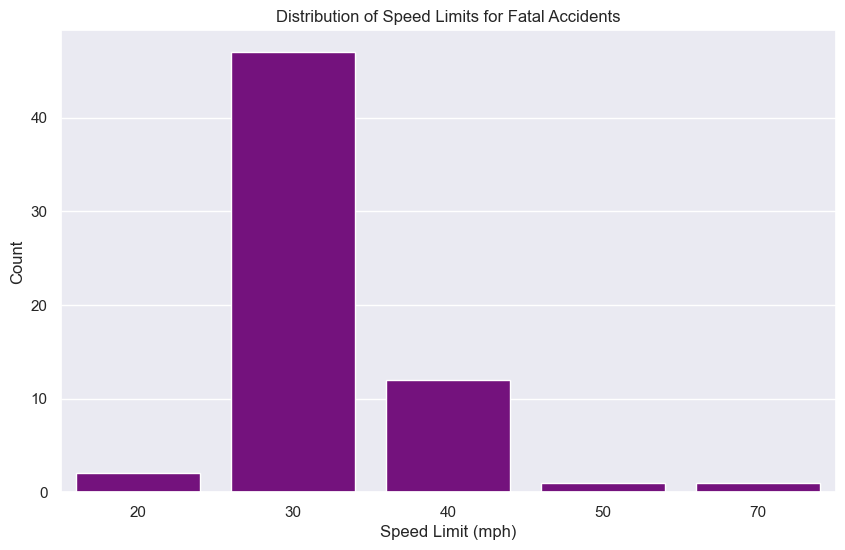

In [624]:
# Subset the data to only include accidents with severity 1
df_severity_1 = df_accident[df_accident['accident_severity'] == 1]

# Create a count plot to show the distribution of speed limits for severity 3 accidents
sb.countplot(x='speed_limit', data=df_severity_1, color='#83008F')

# Set the plot title and axis labels
plt.title('Distribution of Speed Limits for Fatal Accidents')
plt.xlabel('Speed Limit (mph)')
plt.ylabel('Count')

# Show the plot
plt.show()

This chart also shows that most fatal accidents occurred in areas where the speed limit was 30 mph

### 2.7) LSOA Location Descriptive Statistics

This is location data is an overview of the various geographies used in the production of statistics collected via the UK census. It can be used to pinpoint locations in both Uk and Wales

In [625]:
# Count the number of occurrences of each unique value in the `number_of_casualties` column
accident_speed_limit = df_accident['lsoa_of_accident_location'].value_counts()

# Print the counts for each unique value
print(accident_speed_limit)

E01033561    163
E01009200    130
E01009102    100
E01033620     98
E01033615     93
            ... 
E01009993      1
E01010096      1
E01009802      1
E01010355      1
E01010010      1
Name: lsoa_of_accident_location, Length: 646, dtype: int64


In [626]:
#Getting the value counts of the lsoa_of_accident_location variable
values = pd.DataFrame(df_accident.loc[:, 'lsoa_of_accident_location'].value_counts()[0:10])
values.columns = ['Accident Count in Location']

#The normalize attribute in the value_counts method computes the percentage of each
percentages = pd.DataFrame(round(df_accident.loc[:, 'lsoa_of_accident_location'].value_counts(normalize=True) * 100, 2)
                           .map(lambda x: str(x) + '%'))
percentages.columns = ['Accident Percentage %']
values.join(percentages)

,Accident Count in Location,Accident Percentage %
E01033561,163,1.67%
E01009200,130,1.33%
E01009102,100,1.02%
E01033620,98,1.0%
E01033615,93,0.95%
E01009239,91,0.93%
E01009378,78,0.8%
E01009201,71,0.73%
E01033640,68,0.7%
E01008914,68,0.7%


It is observed that **E010133561** is the location in which the most accident has occurred.

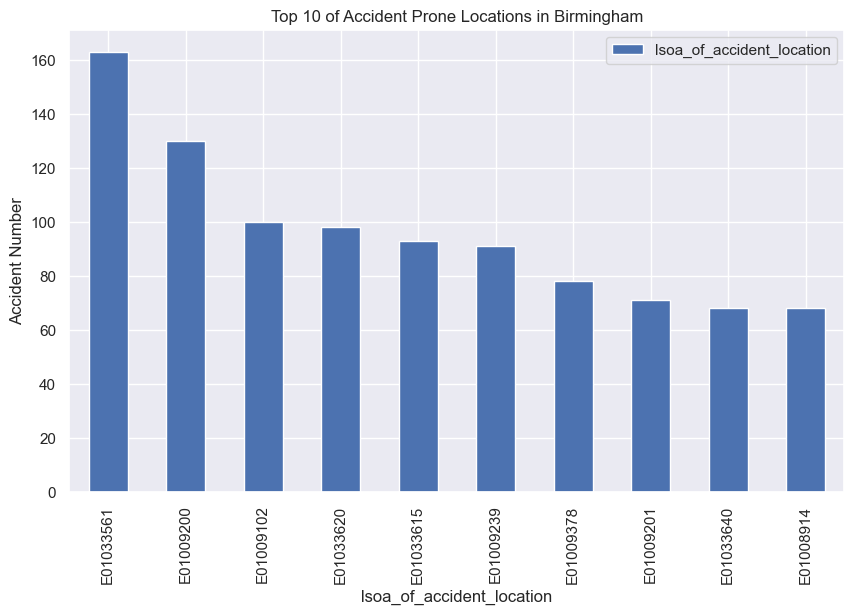

In [627]:
# Bar chart of the highest accidents per location
pd.DataFrame(df_accident.loc[:, 'lsoa_of_accident_location'].value_counts()[0:10]).plot(kind='bar', )

# set plot title and labels
plt.title('Top 10 of Accident Prone Locations in Birmingham')
plt.xlabel('lsoa_of_accident_location')
plt.ylabel('Accident Number')
plt.show()

The value counts and the bar chart illustrate the top 10 most accident-prone areas.

### 2.8) Descriptive Statistics on Weather Conditions

**Weather Conditions Numbers Explained**

- 1 = Fine no high winds
- 2 = Raining no high winds
- 3 = Snowing no high winds
- 4 = Fine + high winds
- 5 = Raining + high winds
- 6 = Snowing + high winds
- 7 = Fog or mist
- 8 = Other
- 9 = Unknown

In [628]:
#Getting the value counts of the weather_conditions variable
values = pd.DataFrame(df_accident.loc[:, 'weather_conditions'].value_counts()[0:10])
values.columns = ['Weather Conditions in that Location']

#The normalize attribute in the value_counts method computes the percentage of each
percentages = pd.DataFrame(round(df_accident.loc[:, 'weather_conditions'].value_counts(normalize=True) * 100, 2)
                           .map(lambda x: str(x) + '%'))
percentages.columns = ['Weather conditions %']
values.join(percentages)

,Weather Conditions in that Location,Weather conditions %
1,7539,77.23%
2,1075,11.01%
9,593,6.07%
8,296,3.03%
5,85,0.87%
4,81,0.83%
3,54,0.55%
7,26,0.27%
6,13,0.13%


More than 75% of accidents occurred in 'Fine no high winds' conditions

**Investigating the impact of weather conditions to accident severity**

In [629]:
# Create the cross tabulation table
cross_tab = pd.crosstab(index=df_accident['weather_conditions'], columns=df_accident['accident_severity'])

# Print the table
print(cross_tab)

accident_severity    1     2     3
weather_conditions                
1                   52  1155  6332
2                    4   173   898
3                    1     8    45
4                    1    18    62
5                    0    14    71
6                    0     1    12
7                    0     8    18
8                    2    37   257
9                    3    83   507


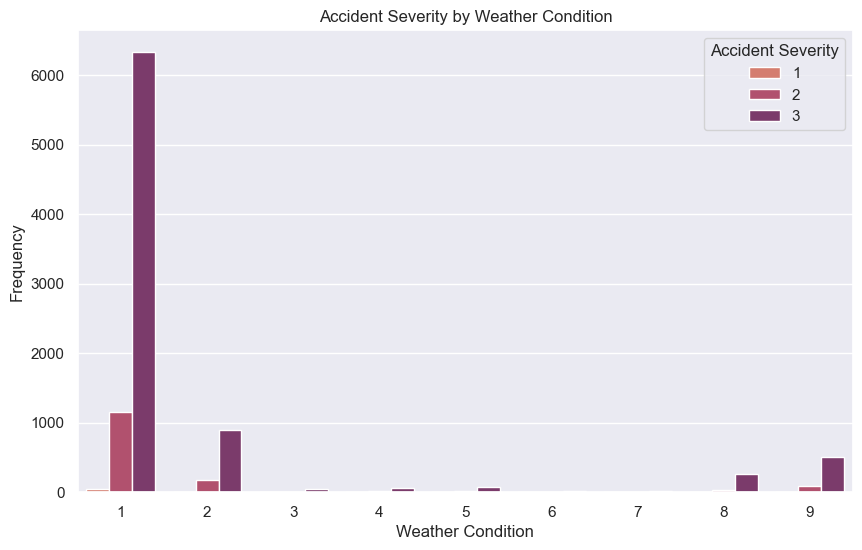

In [630]:
# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the axes to remove the background color and set it to transparent
sb.axes_style("whitegrid")

sb.countplot(x='weather_conditions', hue='accident_severity', data=df_accident, palette='flare')

# Set the plot title and axis labels
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.legend(title='Accident Severity')
plt.show()

Due to most accidents happening in Fine no High Winds weather conditions, more fatal accidents are prone to also happen in that weather condition

### 2.9) Descriptive Statistics on Road Surface Conditions

**Road Surface Numbers Explained**

- 1 = Dry
- 2 = Wet or damp
- 3 = Snow
- 4 = Frost or Ice
- 5 = Flood over 3cm deep
- -1 = Data missing or out of range

In [631]:
# Count the number of occurrences of each unique value in the `road_surface_conditions` column
accident_road_surface_conditions = df_accident['road_surface_conditions'].value_counts()

# Print the counts for each unique value
print(accident_road_surface_conditions)

 1    7242
 2    2361
 4      72
 3      44
-1      40
 5       3
Name: road_surface_conditions, dtype: int64


Most accidents occur in dry road surfaces, and the number of accidents reduce as the road surface worsens

In [632]:
# Create the cross-tabulation table
cross_tab = pd.crosstab(index=df_accident['road_surface_conditions'], columns=df_accident['accident_severity'])

# Print the table
print(cross_tab)

accident_severity         1     2     3
road_surface_conditions                
-1                        0     6    34
 1                       51  1067  6124
 2                       12   407  1942
 3                        0     4    40
 4                        0    13    59
 5                        0     0     3


In [633]:
# Create a cross tabulation of road_surface_conditions and accident_severity
cross_tab = pd.crosstab(df_accident['road_surface_conditions'], df_accident['accident_severity'])

cross_tab

accident_severity,1,2,3
road_surface_conditions,,,
-1,0,6,34
1,51,1067,6124
2,12,407,1942
3,0,4,40
4,0,13,59
5,0,0,3


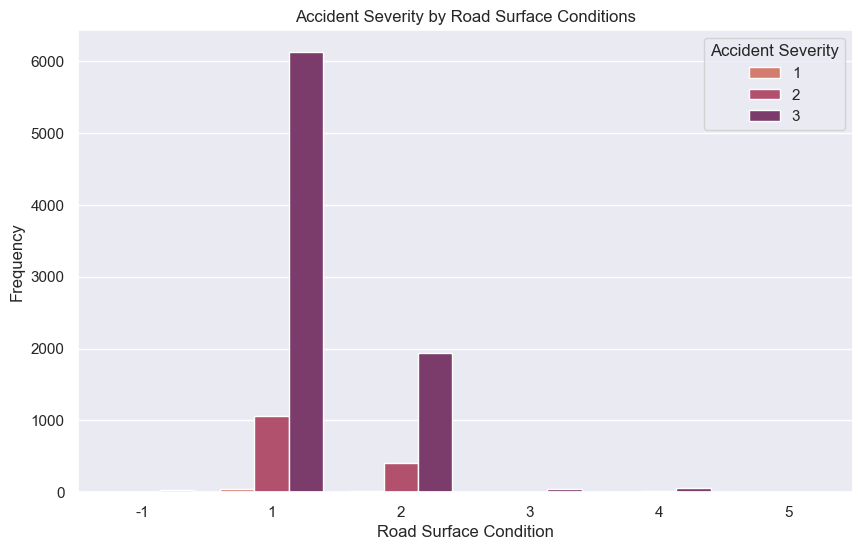

In [634]:
# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the axes to remove the background color and set it to transparent
sb.axes_style("whitegrid")

sb.countplot(x='road_surface_conditions', hue='accident_severity', data=df_accident, palette='flare')

# Set the plot title and axis labels
plt.title('Accident Severity by Road Surface Conditions')
plt.xlabel('Road Surface Condition')
plt.ylabel('Frequency')
plt.legend(title='Accident Severity')
plt.show()

Due to most accidents happening on dry road surface conditions, more fatal accidents are prone to also happen on that road surface condition

### 2.10) Descriptive Statistics on Lighting Conditions

**Lighting Condition Numbers Explained**

- 1 = Daylight
- 4 = Darkness - lights lit
- 5 = Darkness - lights unlit
- 6 = Darkness - no lighting
- 7 = Darkness - lighting unknown

In [635]:
# Count the number of occurrences of each unique value in the `light_conditions` column
accident_light_conditions = df_accident['light_conditions'].value_counts()

# Print the counts for each unique value
print(accident_light_conditions)

1    6571
4    2948
7     152
5      59
6      32
Name: light_conditions, dtype: int64


Most accidents occur during the day

**Looking deeper into the amount of accidents on different road conditions with light conditions**

In [636]:
# Create the cross-tabulation table
cross_tab = pd.crosstab(index=df_accident['road_surface_conditions'], columns=df_accident['light_conditions'])

# Print the table
cross_tab

light_conditions,1,4,5,6,7
road_surface_conditions,,,,,
-1,22,11,0,1,6
1,5265,1808,40,18,111
2,1229,1068,19,12,33
3,20,23,0,0,1
4,34,37,0,1,0
5,1,1,0,0,1


We can observe that most accidents also occur the most on dry road surface and during daylight

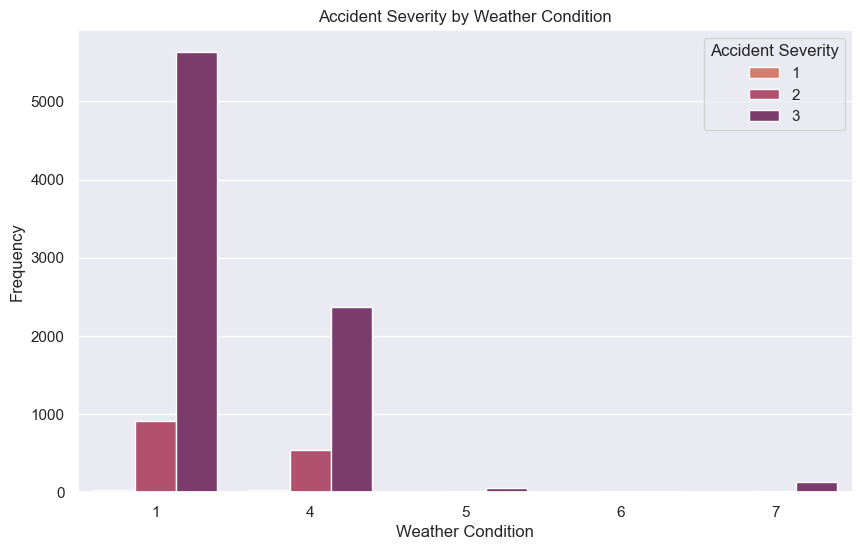

In [637]:
# Create a cross tabulation of weather_condition and accident_severity
cross_tab = pd.crosstab(df_accident['light_conditions'], df_accident['accident_severity'])

# Set the axes to remove the background color and set it to transparent
sb.set(rc={'figure.figsize': (10, 6)})
# Set the axes to remove the background color and set it to transparent
sb.axes_style("whitegrid")

sb.countplot(x='light_conditions', hue='accident_severity', data=df_accident, palette='flare')

# Set the plot title and axis labels
plt.title('Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.legend(title='Accident Severity')
plt.show()

Due to most accidents happening in daylight, more fatal accidents are prone to also happen in that lighting condition

From the matrix we can observe that speed limit and trunk_road_flag have a strong positive correlation. THe other variables seem to have either a very low positive relationship or a very low negative relationship.

## 2) Data preprocessing (Data cleaning, Handling missing values)

**The first done is to identify the columns which would not be useful to help implement the solution to the business problem. The columns which where identified to be useful and would also act as our independent variables are:**
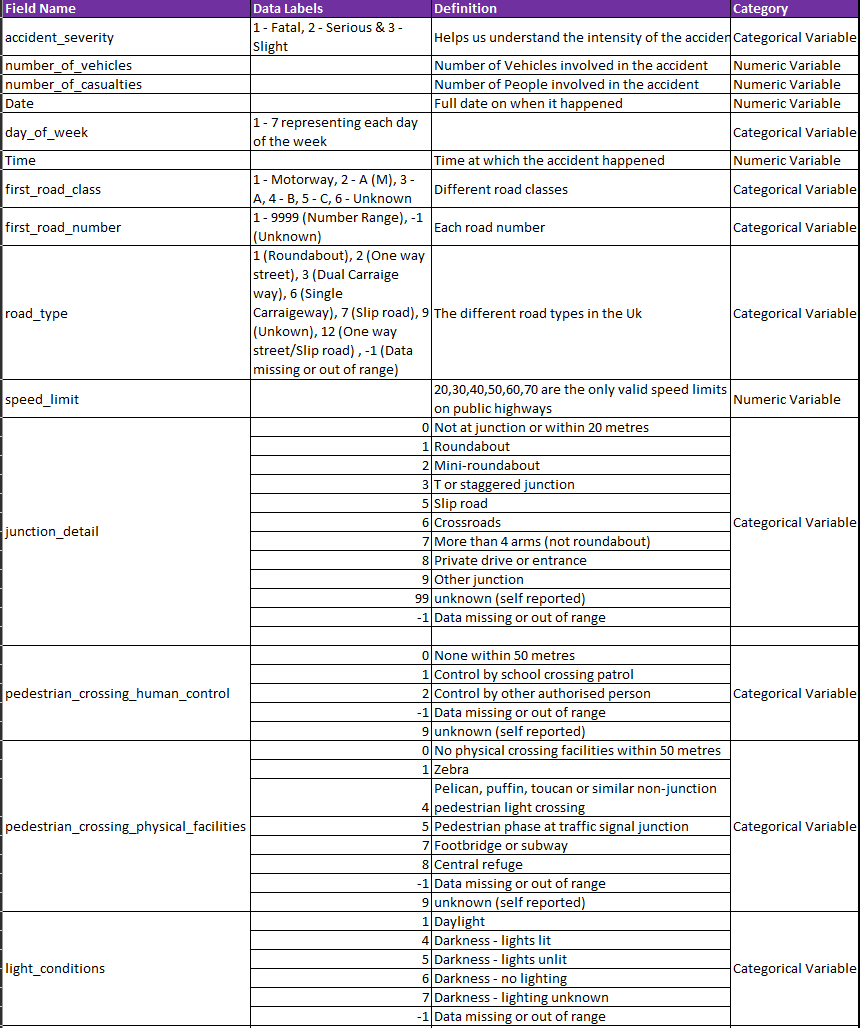
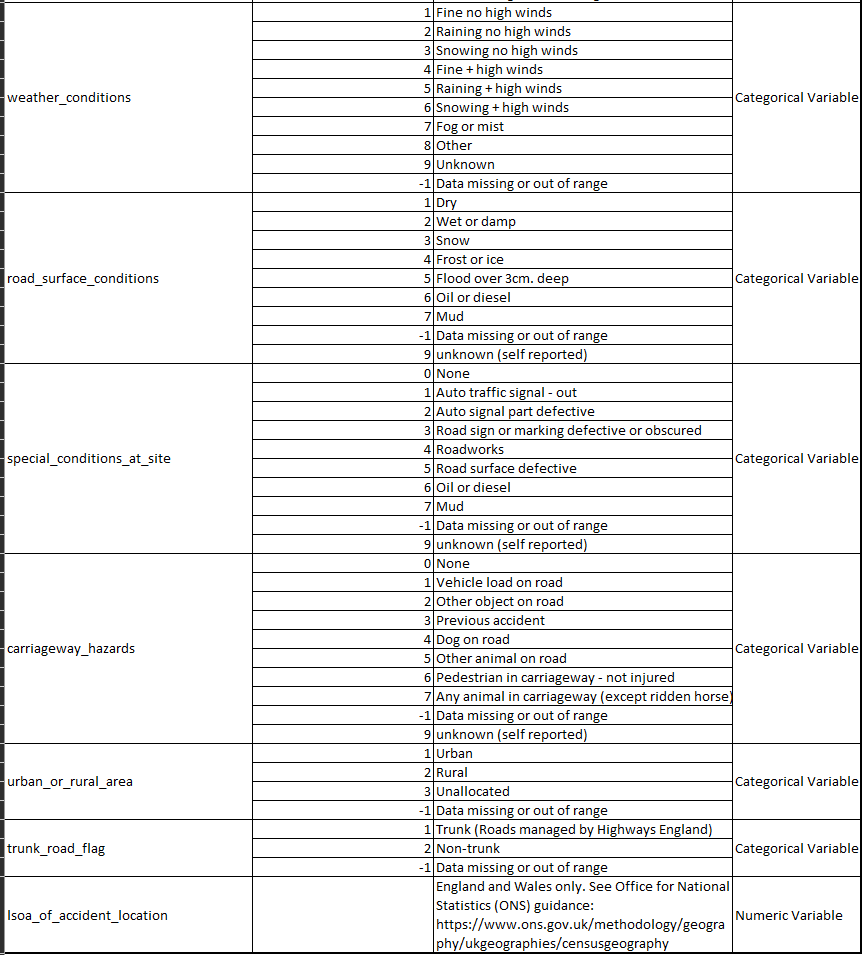

In [638]:
# Deleting Unused Columns
df_accident.drop(["accident_index", "accident_reference", "accident_year", "police_force",
                  "did_police_officer_attend_scene_of_accident", "location_easting_osgr", "location_northing_osgr",
                  "local_authority_district", "local_authority_highway", "local_authority_ons_district", "longitude",
                  "junction_control", "second_road_class", "second_road_number",
                  "latitude"], axis=1, inplace=True)
df_accident.head()

,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,lsoa_of_accident_location
55371,3,1,1,01/01/2017,1,16:46,6,0,6,30,...,0,1,4,8,2,0,0,1,2,E01009451
55372,3,3,2,02/01/2017,2,09:30,6,0,6,30,...,0,0,1,8,4,0,0,1,2,E01009068
55376,2,1,1,01/01/2017,1,03:17,6,0,2,30,...,0,0,4,9,1,0,0,1,2,E01033639
55377,2,1,1,05/01/2017,5,08:33,6,0,6,30,...,0,0,1,1,1,0,0,1,2,E01009341
55380,2,1,1,16/01/2017,2,17:20,6,0,6,30,...,0,0,4,2,2,0,0,1,2,E01009175


In [639]:
# Validating the number of rows and columns
df_accident.shape

(9762, 21)

In [640]:
# Find Missing Values
df_accident = df_accident.replace(-1, None)
df_accident.isna().sum()

accident_severity                           0
number_of_vehicles                          0
number_of_casualties                        0
date                                        0
day_of_week                                 0
time                                        0
first_road_class                            0
first_road_number                           0
road_type                                   0
speed_limit                                 0
junction_detail                             0
pedestrian_crossing_human_control          29
pedestrian_crossing_physical_facilities    27
light_conditions                            0
weather_conditions                          0
road_surface_conditions                    40
special_conditions_at_site                 10
carriageway_hazards                        10
urban_or_rural_area                         0
trunk_road_flag                             0
lsoa_of_accident_location                   0
dtype: int64

In [641]:
# Delete Rows with Missing Values
df_accident.dropna(inplace=True)

In [642]:
# remove the duplicates
df_accident.drop_duplicates(inplace=True)

**We need to extract the Months from the date column because the data does not provide the accidents per month**

In [643]:
# Extracting Month From Date Column
df_accident[["day", "month", "year"]] = df_accident["date"].apply(lambda x: pd.Series(str(x).split("/")))
df_accident.drop(["day", "date"], axis=1, inplace=True)
df_accident.head()

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,time,first_road_class,first_road_number,road_type,speed_limit,junction_detail,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,lsoa_of_accident_location,month,year
55371,3,1,1,1,16:46,6,0,6,30,0,...,4,8,2,0,0,1,2,E01009451,01,2017
55372,3,3,2,2,09:30,6,0,6,30,0,...,1,8,4,0,0,1,2,E01009068,01,2017
55376,2,1,1,1,03:17,6,0,2,30,3,...,4,9,1,0,0,1,2,E01033639,01,2017
55377,2,1,1,5,08:33,6,0,6,30,0,...,1,1,1,0,0,1,2,E01009341,01,2017
55380,2,1,1,2,17:20,6,0,6,30,3,...,4,2,2,0,0,1,2,E01009175,01,2017




**The hour which the accident occurred is also useful to help identify high risk times and would be a very important predictor variable for the model**

The data set only provides the full time at which the accident occurred, the code below extracts the hour from the time column and creates a new column called hour and places each hour each accident occurred in that column.



In [644]:
# Extracting Hour From Time Column
df_accident[["hour", "minute"]] = df_accident["time"].apply(lambda x: pd.Series(str(x).split(":")))
df_accident.drop(["time", "minute"], axis=1, inplace=True)
df_accident.head()

,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag,lsoa_of_accident_location,month,year,hour
55371,3,1,1,1,6,0,6,30,0,0,...,8,2,0,0,1,2,E01009451,01,2017,16
55372,3,3,2,2,6,0,6,30,0,0,...,8,4,0,0,1,2,E01009068,01,2017,09
55376,2,1,1,1,6,0,2,30,3,0,...,9,1,0,0,1,2,E01033639,01,2017,03
55377,2,1,1,5,6,0,6,30,0,0,...,1,1,0,0,1,2,E01009341,01,2017,08
55380,2,1,1,2,6,0,6,30,3,0,...,2,2,0,0,1,2,E01009175,01,2017,17


We created dummy variables to help calculate the number of accidents for each day of the week that month.

In [645]:
# Dummy Variable Encoding
# create 7 columns using pandas get_dummies function
day_cols = pd.get_dummies(df_accident["day_of_week"], prefix="day")

# merge the one-hot encoded dataframe with the original dataframe
df_accident = pd.concat([df_accident, day_cols], axis=1)

# drop the original 'Day_of_Week' column
df_accident.drop("day_of_week", axis=1, inplace=True)
df_accident.head()

,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,...,month,year,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7
55371,3,1,1,6,0,6,30,0,0,1,...,01,2017,16,1,0,0,0,0,0,0
55372,3,3,2,6,0,6,30,0,0,0,...,01,2017,09,0,1,0,0,0,0,0
55376,2,1,1,6,0,2,30,3,0,0,...,01,2017,03,1,0,0,0,0,0,0
55377,2,1,1,6,0,6,30,0,0,0,...,01,2017,08,0,0,0,0,1,0,0
55380,2,1,1,6,0,6,30,3,0,0,...,01,2017,17,0,1,0,0,0,0,0


In [646]:
# Grouping Data By Location (LSOA) & Month
group_df = df_accident.groupby(["lsoa_of_accident_location", "year", "month"])
print("Total Groups - ", len(group_df))

Total Groups -  7381


In [647]:
# Display First Group
df_first = pd.DataFrame
for group, data in group_df:
    print("First Group (Location, Year, Month) - ", group)
    df_first = data
    break
df_first.head()

First Group (Location, Year, Month) -  ('E01008881', '2017', '04')


,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,...,month,year,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7
56782,3,2,1,3,4040,1,30,1,0,0,...,04,2017,07,0,0,0,0,0,0,1
56837,3,2,1,3,4040,6,30,1,0,0,...,04,2017,17,0,0,0,0,1,0,0


In [648]:
# Calculating the Sums of Vehicles & Casualties Columns
cols = ["number_of_vehicles", "number_of_casualties", "day_1", "day_2", "day_3", "day_4", "day_5", "day_6", "day_7"]
count = 0
for group, data in group_df:
    # Displaying First 2 Sums
    if count < 2:
        print("Group", (count + 1), "- ", group)
        print(data[cols].sum(), "\n")
        count += 1

Group 1 -  ('E01008881', '2017', '04')
number_of_vehicles      4
number_of_casualties    2
day_1                   0
day_2                   0
day_3                   0
day_4                   0
day_5                   1
day_6                   0
day_7                   1
dtype: int64 

Group 2 -  ('E01008881', '2017', '07')
number_of_vehicles      2
number_of_casualties    1
day_1                   1
day_2                   0
day_3                   0
day_4                   0
day_5                   0
day_6                   0
day_7                   0
dtype: int64 



In [649]:
# Calculating the Mode (Most Occurrence) Of Each Column
count = 0

# Displaying for First Group
df_mode = pd.DataFrame
for group, data in group_df:
    if count < 1:
        print("First Group - ", group)
        df_mode = data.mode(numeric_only=False, dropna=True).dropna()
        count += 1
df_mode.head()

First Group -  ('E01008881', '2017', '04')


,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,...,month,year,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,3.0,2.0,1.0,3.0,4040.0,1,30.0,1.0,0,0,...,04,2017,07,0.0,0.0,0.0,0.0,0,0.0,0


In [650]:
# Creating the final Dataset with required columns
df_final = pd.DataFrame(columns=["no_of_accidents"] + df_mode.columns.tolist())
df_final.head()

,no_of_accidents,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,...,month,year,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7


In [651]:
# Combining ModeDF & SumDF to Create Final Dataset
count = 0
for group, data in group_df:
    # Calculate Modes in Group
    df_mode = data.mode(numeric_only=False, dropna=True).dropna()

    # Calculate Sums (Vehicles & Casualties) in Group
    df_sum = DataFrame(data[cols].sum()).transpose()

    # Replace Vehicles Column (SumDF -> ModeDF)
    df_mode.number_of_vehicles = df_sum.number_of_vehicles

    # Replace Casualties Column (SumDF -> ModeDF)
    df_mode.number_of_casualties = df_sum.number_of_casualties

    # Replace Day1 - Day7 Columns (SumDF -> ModeDF)
    for day in day_cols:
        df_mode[day] = df_sum[day]

    # Append Updated ModeDF to FinalDF
    df_final = pd.concat([df_final, df_mode.iloc[:1]])
    df_final = df_final.reset_index(drop=True)

# Get Total Number of Accidents Per Month
df_final.no_of_accidents = df_final.day_1 + df_final.day_2 + df_final.day_3 + df_final.day_4 + df_final.day_5 + df_final.day_6 + df_final.day_7
df_final.shape

(7381, 29)

In [652]:
# Dataset Sample
df_final.head()

,no_of_accidents,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,...,month,year,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7
0,2,3.0,4,2,3.0,4040.0,1,30.0,1.0,0,...,04,2017,07,0,0,0,0,1,0,1
1,1,3.0,2,1,6.0,0.0,2,30.0,1.0,0,...,07,2017,07,1,0,0,0,0,0,0
2,1,3.0,1,1,6.0,0.0,6,30.0,0.0,0,...,11,2017,16,0,0,0,0,0,1,0
3,1,3.0,2,1,3.0,4040.0,3,30.0,0.0,0,...,12,2017,10,0,0,0,0,0,1,0
4,1,3.0,2,2,6.0,0.0,6,30.0,0.0,0,...,01,2018,16,0,0,1,0,0,0,0


In [653]:
# Label Encoding

# Creating an Instance of Label Encoder.
le = LabelEncoder()

# Using .fit_transform to Fit Labels for Month & Location
label_month = le.fit_transform(df_final.month)
label_location = le.fit_transform(df_final.lsoa_of_accident_location)


In [654]:
# Printing Month Label
label_month

array([ 3,  6, 10, ...,  0,  1,  6])

In [655]:
# Printing Location Label
label_location

array([  0,   0,   0, ..., 645, 645, 645])

In [656]:
# Replacing Location & Month Columns with the Encoded Versions
df_final.drop(["lsoa_of_accident_location", "month"], axis=1, inplace=True)

In [657]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   no_of_accidents                          7381 non-null   object 
 1   accident_severity                        7381 non-null   float64
 2   number_of_vehicles                       7381 non-null   object 
 3   number_of_casualties                     7381 non-null   object 
 4   first_road_class                         7381 non-null   float64
 5   first_road_number                        7381 non-null   float64
 6   road_type                                7381 non-null   object 
 7   speed_limit                              7381 non-null   float64
 8   junction_detail                          7381 non-null   float64
 9   pedestrian_crossing_human_control        7381 non-null   object 
 10  pedestrian_crossing_physical_facilities  7381 no

In [658]:
df_final["location"] = label_location
df_final["month"] = label_month

In [659]:
# Final Dataset Sample
df_final.head(n=10)

,no_of_accidents,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,...,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7,location,month
0,2,3.0,4,2,3.0,4040.0,1,30.0,1.0,0,...,07,0,0,0,0,1,0,1,0,3
1,1,3.0,2,1,6.0,0.0,2,30.0,1.0,0,...,07,1,0,0,0,0,0,0,0,6
2,1,3.0,1,1,6.0,0.0,6,30.0,0.0,0,...,16,0,0,0,0,0,1,0,0,10
3,1,3.0,2,1,3.0,4040.0,3,30.0,0.0,0,...,10,0,0,0,0,0,1,0,0,11
4,1,3.0,2,2,6.0,0.0,6,30.0,0.0,0,...,16,0,0,1,0,0,0,0,0,0
5,1,3.0,1,2,6.0,0.0,6,30.0,3.0,0,...,08,0,0,1,0,0,0,0,0,2
6,1,3.0,2,1,6.0,0.0,6,30.0,1.0,0,...,09,0,0,0,0,0,1,0,0,3
7,1,3.0,2,1,6.0,0.0,6,20.0,3.0,0,...,06,0,0,0,0,1,0,0,0,4
8,3,3.0,5,8,6.0,0.0,6.0,30.0,0.0,0,...,14,0,1,1,0,0,0,1,0,5
9,1,3.0,1,1,3.0,4040.0,6,30.0,3.0,0,...,01,0,0,0,0,0,0,1,0,6


In [660]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   no_of_accidents                          7381 non-null   object 
 1   accident_severity                        7381 non-null   float64
 2   number_of_vehicles                       7381 non-null   object 
 3   number_of_casualties                     7381 non-null   object 
 4   first_road_class                         7381 non-null   float64
 5   first_road_number                        7381 non-null   float64
 6   road_type                                7381 non-null   object 
 7   speed_limit                              7381 non-null   float64
 8   junction_detail                          7381 non-null   float64
 9   pedestrian_crossing_human_control        7381 non-null   object 
 10  pedestrian_crossing_physical_facilities  7381 no

In [661]:
df_final = df_final.astype(float)
df_final.describe()

,no_of_accidents,accident_severity,number_of_vehicles,number_of_casualties,first_road_class,first_road_number,road_type,speed_limit,junction_detail,pedestrian_crossing_human_control,...,hour,day_1,day_2,day_3,day_4,day_5,day_6,day_7,location,month
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.00000,...,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,1.313372,2.809511,2.490448,1.769950,4.535835,1074.037393,4.892697,30.722124,2.262972,0.00989,...,13.244547,0.156754,0.175315,0.188999,0.193199,0.199837,0.214741,0.184528,330.374881,5.657093
std,0.698059,0.410594,1.591073,1.331166,1.452862,1797.658702,1.718503,5.345148,2.517811,0.12872,...,5.522872,0.382836,0.401748,0.417657,0.416544,0.431836,0.432525,0.411994,190.450203,3.510825
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,20.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2.000000,1.000000,3.000000,0.000000,3.000000,30.000000,0.000000,0.00000,...,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,3.000000
50%,1.000000,3.000000,2.000000,1.000000,4.000000,0.000000,6.000000,30.000000,1.000000,0.00000,...,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,330.000000,6.000000
75%,1.000000,3.000000,3.000000,2.000000,6.000000,457.000000,6.000000,30.000000,3.000000,0.00000,...,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,479.000000,9.000000
max,11.000000,3.000000,22.000000,18.000000,6.000000,5127.000000,9.000000,70.000000,9.000000,2.00000,...,23.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,645.000000,11.000000


### 2.11) Correlation Matrix
This is done to help identify the strength and direction of the relationship between the variables. This means that if two variables have a strong positive correlation, it indicates that they tend to increase or decrease together. Similarly, a strong negative correlation suggests that the variables tend to move in opposite directions.

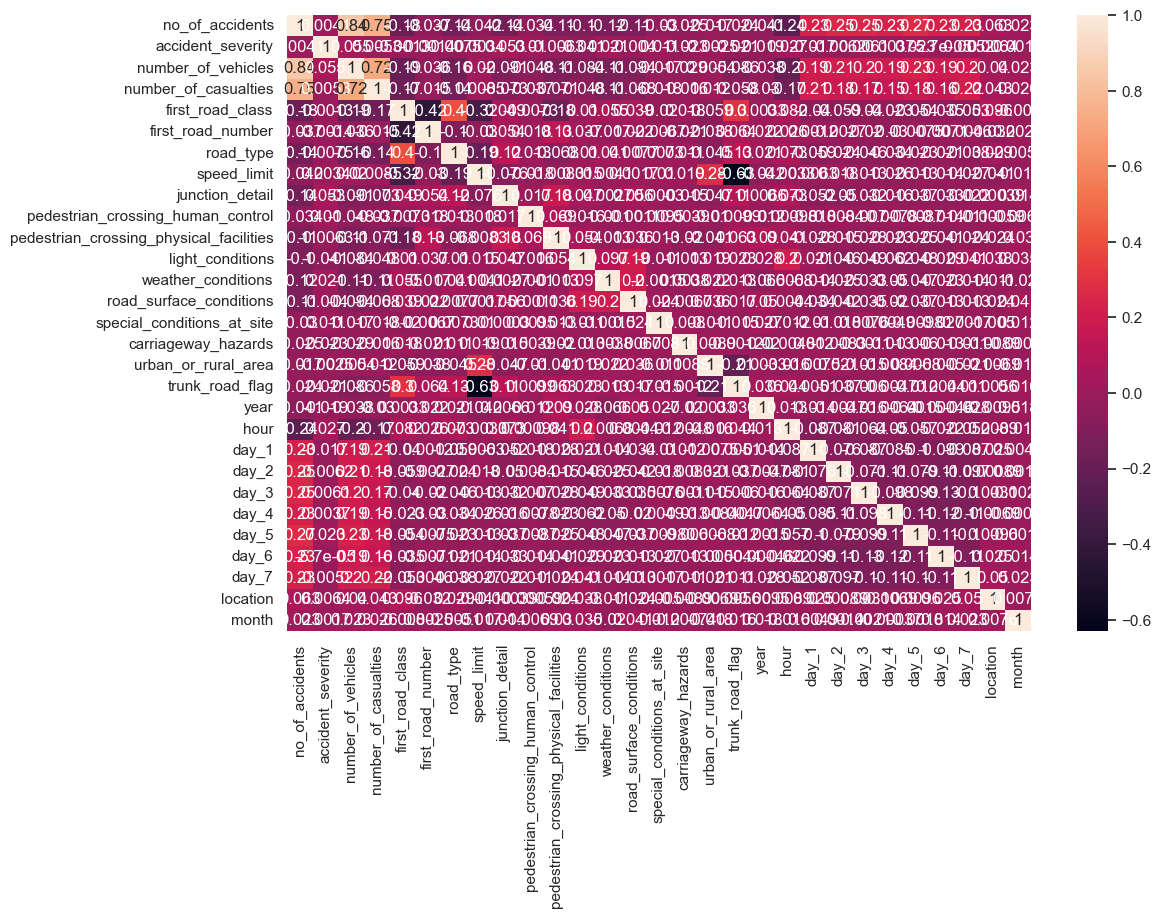

In [662]:
plt.figure(figsize=(12, 8))

# Create heatmap to show correlation matrix
sb.heatmap(df_final.corr(), annot=True)

plt.show()

In [663]:
df_final.to_csv("dataset_5yrs.csv",index=False)